1/1 [==============================] - 0s 87ms/step
Estimated Depth: 0.5040 meters


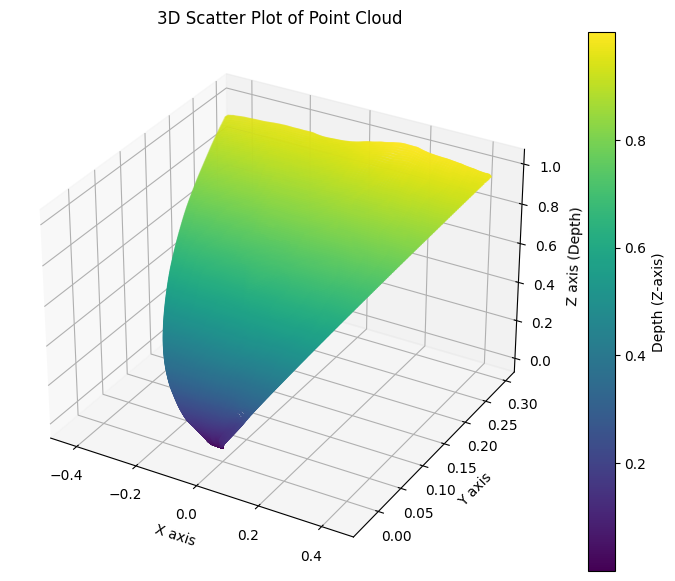

In [6]:
import tensorflow as tf
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the trained model
def load_model(model_file_path):
    model = tf.keras.models.load_model(model_file_path)
    return model

# Preprocess point cloud and predict depth
def preprocess_and_predict(ply_file_path, model):
    point_cloud = o3d.io.read_point_cloud(ply_file_path)
    points = np.asarray(point_cloud.points)
    if points.shape[0] == 0:
        print("Point cloud is empty.")
        return None
    
    # Normalize points
    points = (points - np.mean(points, axis=0)) / np.std(points, axis=0)
    
    # Use a fixed number of points (e.g., 1024)
    num_points = 1024
    if points.shape[0] > num_points:
        indices = np.random.choice(points.shape[0], num_points, replace=False)
        points = points[indices]
    elif points.shape[0] < num_points:
        # Padding with zeros if fewer points
        points = np.pad(points, ((0, num_points - points.shape[0]), (0, 0)), 'constant')
    
    # Predict depth
    depth = model.predict(np.expand_dims(points, axis=0))  # Add batch dimension
    
    return depth[0][0], point_cloud

# Main function
if __name__ == "__main__":
    model_file_path = r'C:\Users\Shashank\OneDrive\Desktop\Point Cloud\model.h5'
    ply_file_path = r'C:\Users\Shashank\OneDrive\Desktop\Point Cloud\DATA\output\potholes17.ply'
    
    # Load model and estimate depth
    model = load_model(model_file_path)
    estimated_depth, point_cloud = preprocess_and_predict(ply_file_path, model)
    
    # Show estimated depth
    if estimated_depth is not None:
        print(f"Estimated Depth: {estimated_depth:.4f} meters")
    
        # Visualize the point cloud
        o3d.visualization.draw_geometries([point_cloud], window_name="Point Cloud Visualization")
        
        # Optionally show 3D scatter plot of point cloud (using Matplotlib)
        points = np.asarray(point_cloud.points)
        
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot points in 3D scatter plot
        scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='viridis', s=1)
        plt.colorbar(scatter, label='Depth (Z-axis)')
        
        # Add labels
        ax.set_title("3D Scatter Plot of Point Cloud")
        ax.set_xlabel("X axis")
        ax.set_ylabel("Y axis")
        ax.set_zlabel("Z axis (Depth)")
        
        plt.show()
